In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:/Users/Lenovo/Downloads/1673873388_rolling_stones_spotify.xlsx')

In [3]:
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4          Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [4]:
df.shape

(1610, 18)

In [5]:
df.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [7]:
# seeing which song has most popularity
most_popular_songs = df.sort_values('popularity',ascending=False)[0:10]

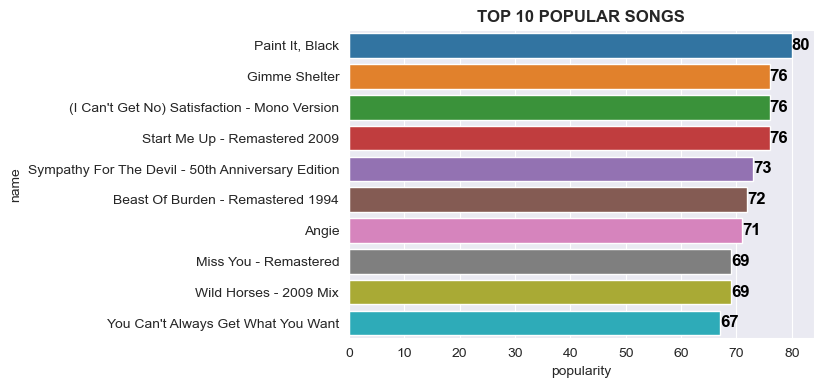

In [8]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))
sns.set_style(style = 'darkgrid')
sns.set_color_codes("pastel")
sns.barplot(most_popular_songs['popularity'],most_popular_songs['name'],orient='h')

for i,v in enumerate(most_popular_songs['popularity']):
    plt.text(v,i,v,color='black',fontsize=12,fontweight='bold', ha='left', va='center')
plt.title('TOP 10 POPULAR SONGS',fontweight='bold')
plt.show()

In [9]:
df['duration_sec'] = round(df['duration_ms']/1000,1)
df.drop('duration_ms',axis=1,inplace=True)

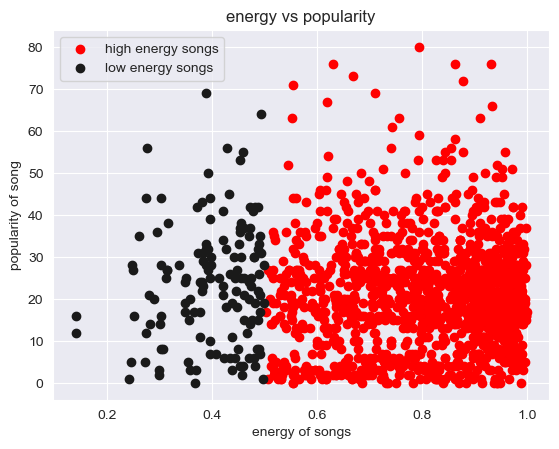

In [10]:
plt.scatter(df[df['energy']>0.5]['energy'],df[df['energy']>0.5]['popularity'],color = 'red',alpha  =1,label='high energy songs')
plt.scatter(df[df['energy']<0.5]['energy'],df[df['energy']<0.5]['popularity'],color = 'k',alpha = 1,label = 'low energy songs')
plt.ylabel('popularity of song')
plt.xlabel('energy of songs')
plt.title('energy vs popularity')
plt.legend()
plt.show()

In [11]:
# renaming a misnamed value in album
df['album'] = np.where(df[['album']]=='12 x 5','12 X 5',df[['album']])

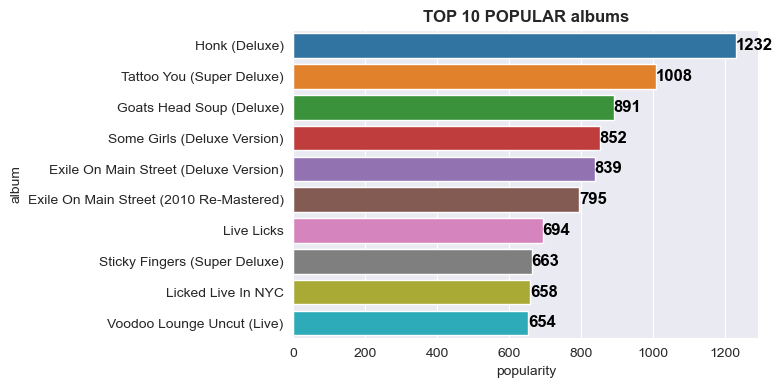

In [12]:
most_popular_albums = df.groupby('album')[['popularity']].sum().sort_values('popularity',ascending=False)[0:10]
plt.figure(figsize = (6,4))
sns.set_style(style = 'darkgrid')
sns.set_color_codes("pastel")
sns.barplot(most_popular_albums['popularity'],most_popular_albums.index,orient='h')

for i,v in enumerate(most_popular_albums['popularity']):
    plt.text(v,i,v,color='black',fontsize=12,fontweight='bold', ha='left', va='center')
    
plt.title('TOP 10 POPULAR albums',fontweight='bold')
plt.show()

In [13]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_sec'],
      dtype='object')

# clustering

In [14]:
cluster_df = df.drop(columns = ['Unnamed: 0','name','release_date','track_number','id','uri'])

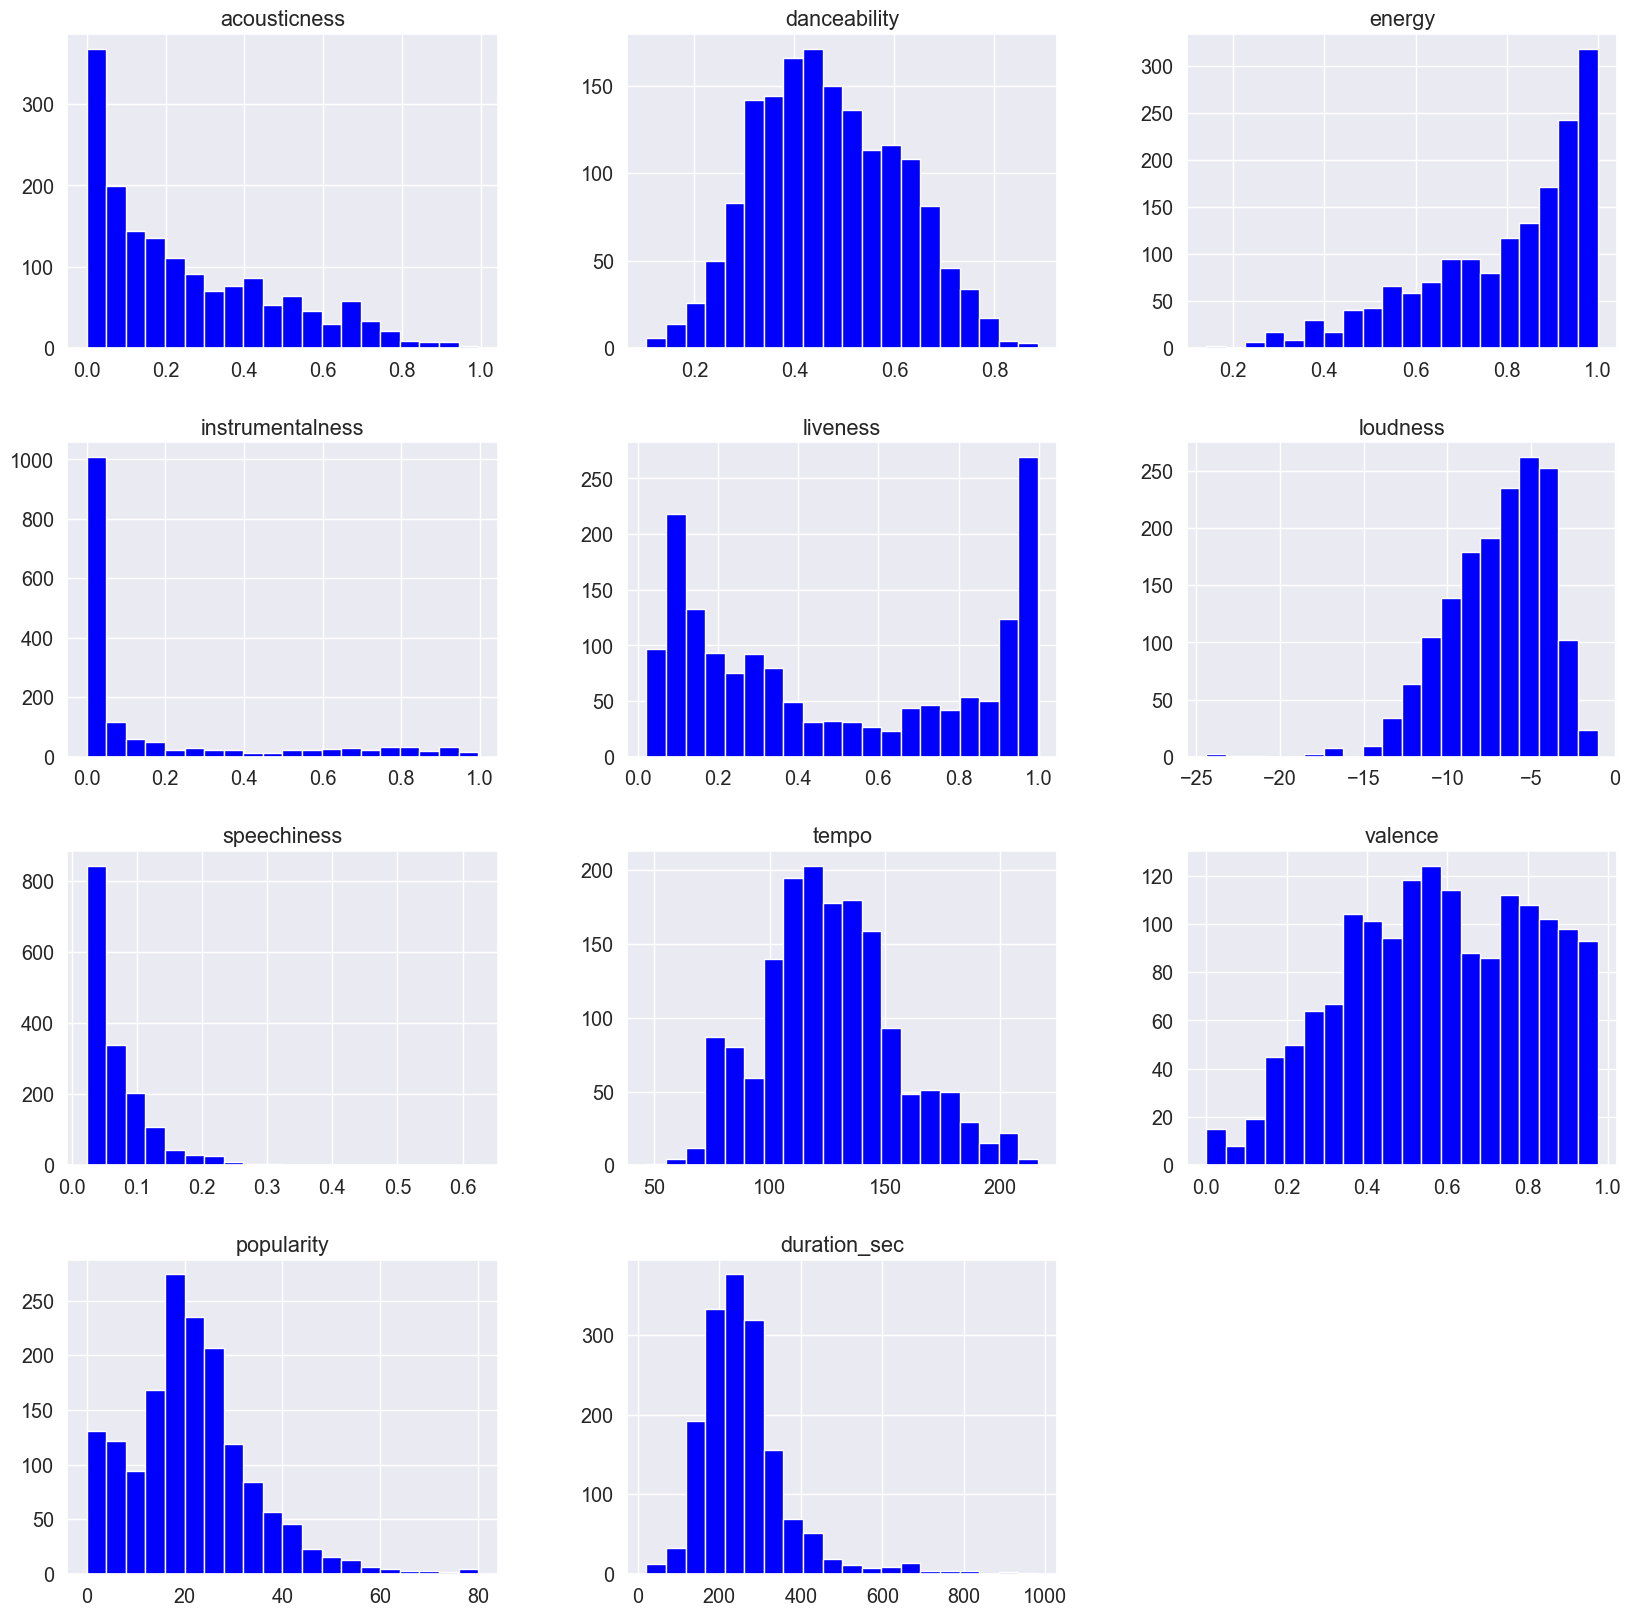

In [15]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=cluster_df.hist(bins=20,color='blue' )

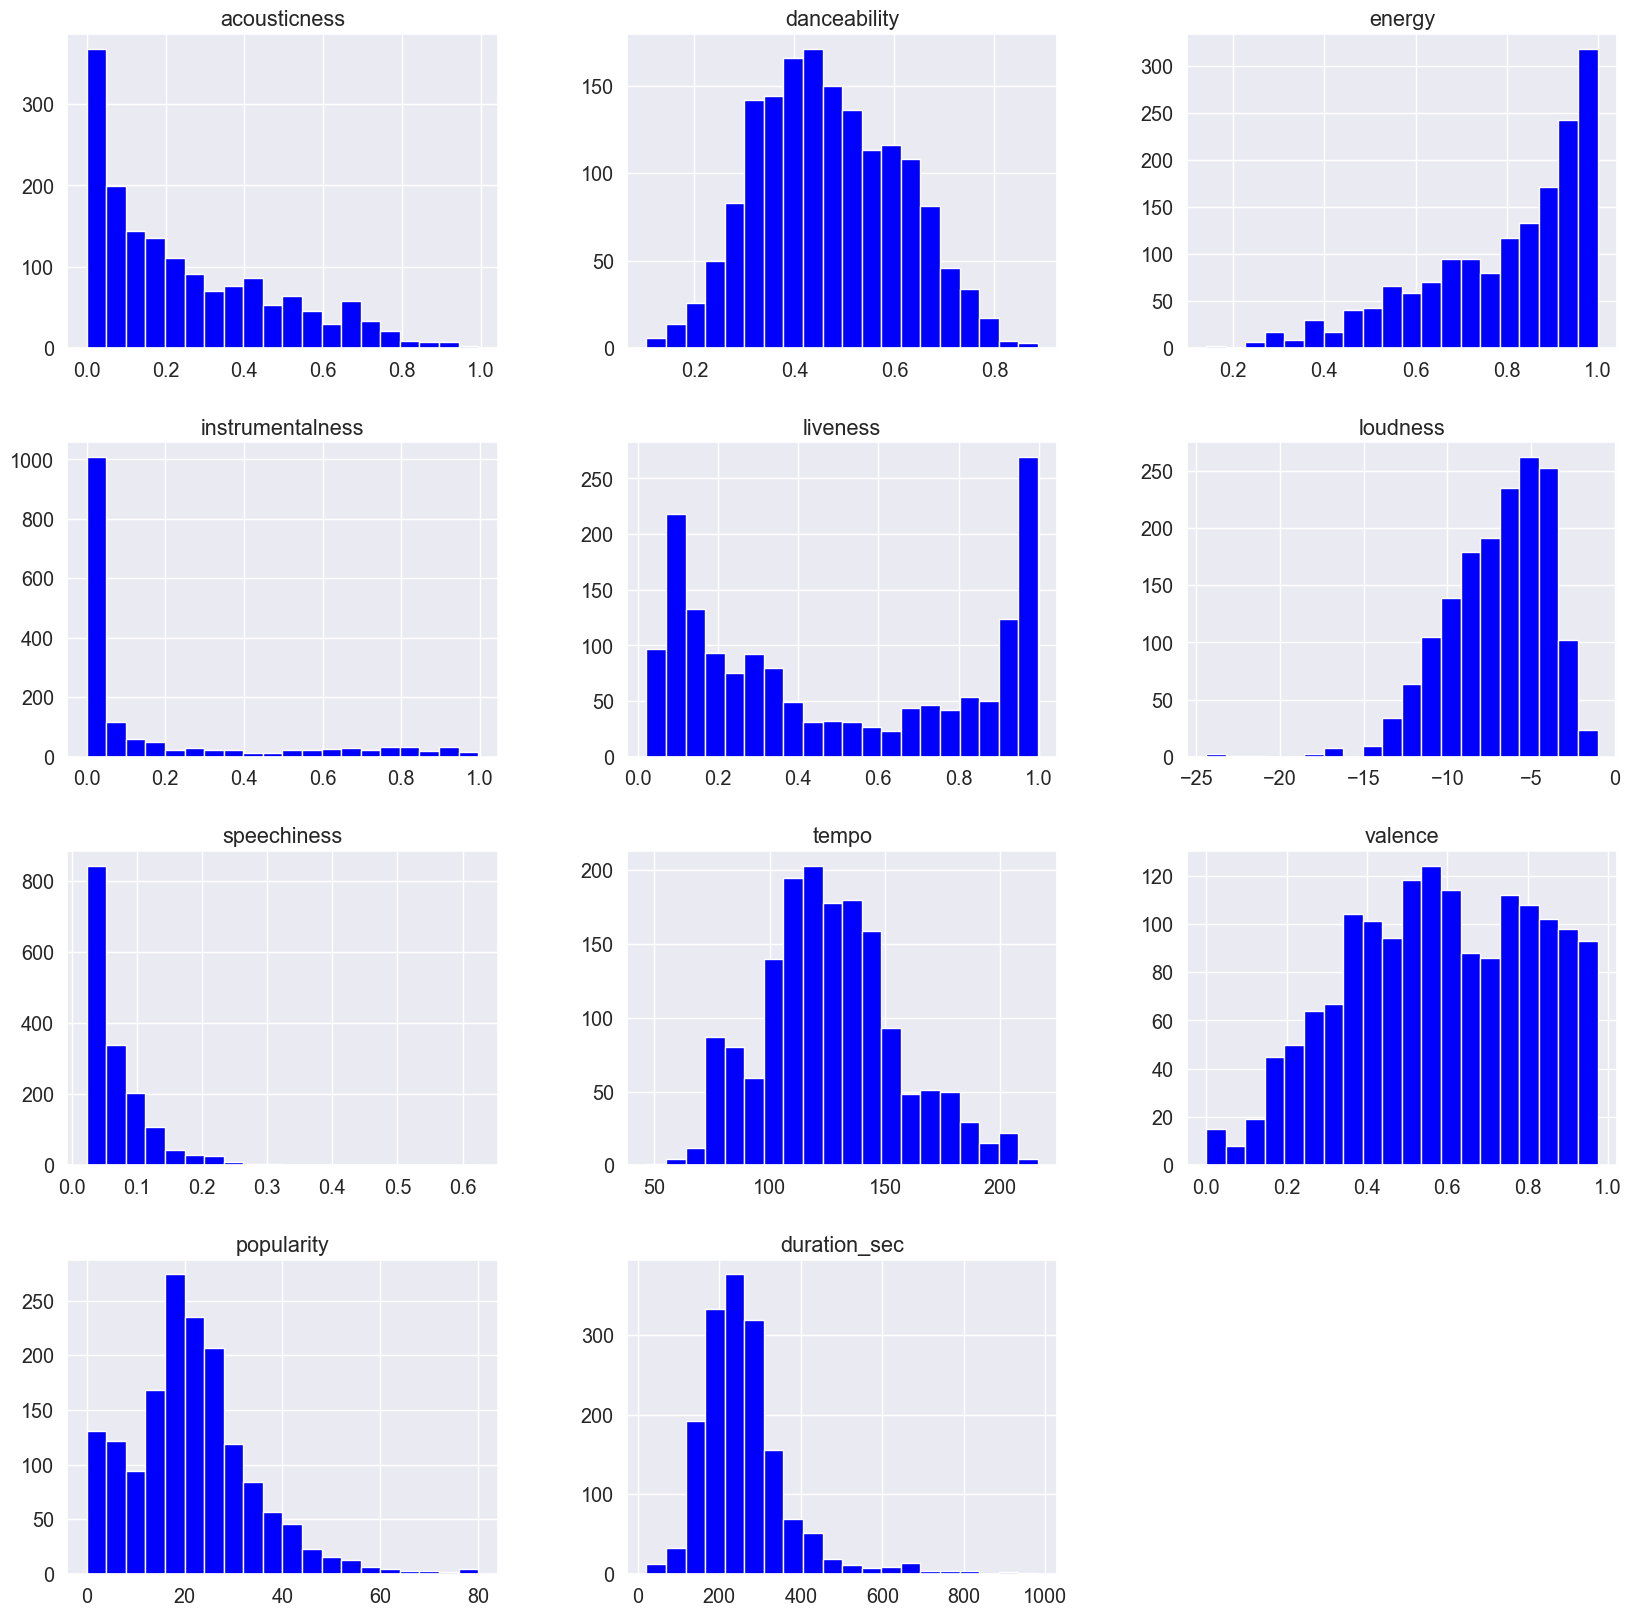

In [16]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=cluster_df.hist(bins=20,color='blue' )

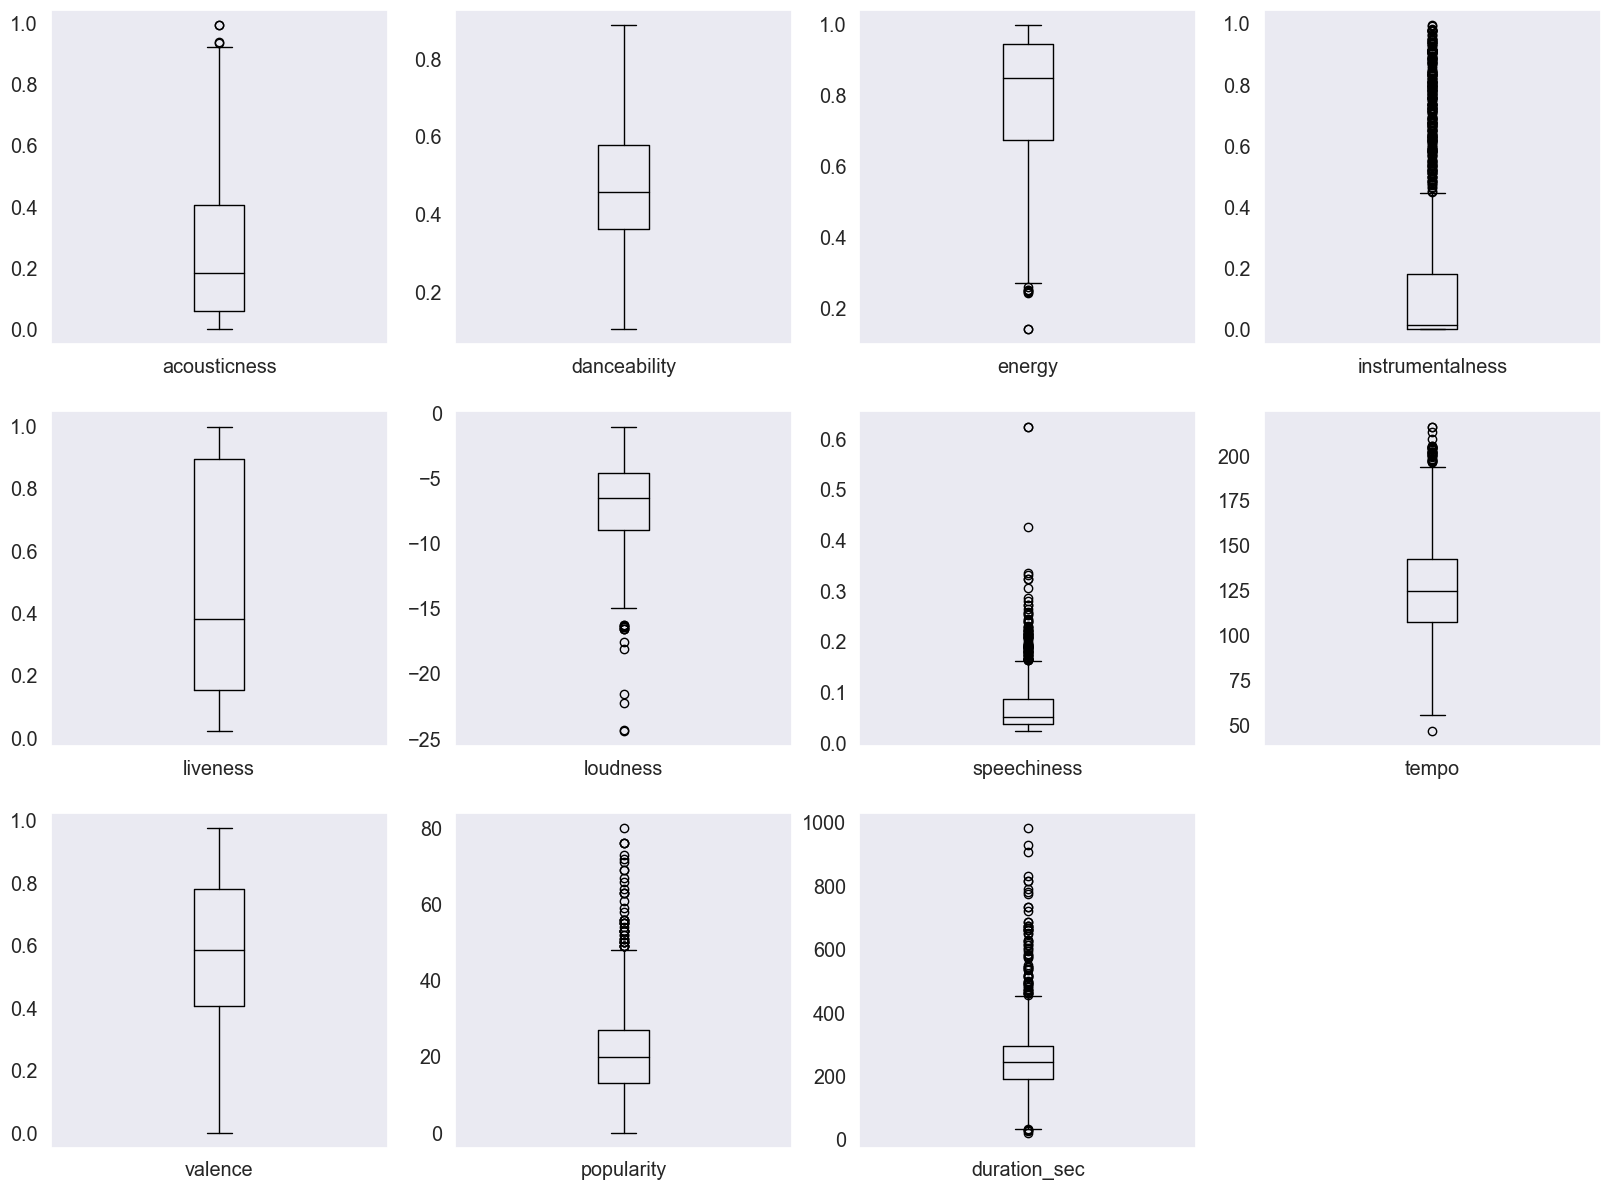

In [17]:
cluster_df.plot(kind = 'box',subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

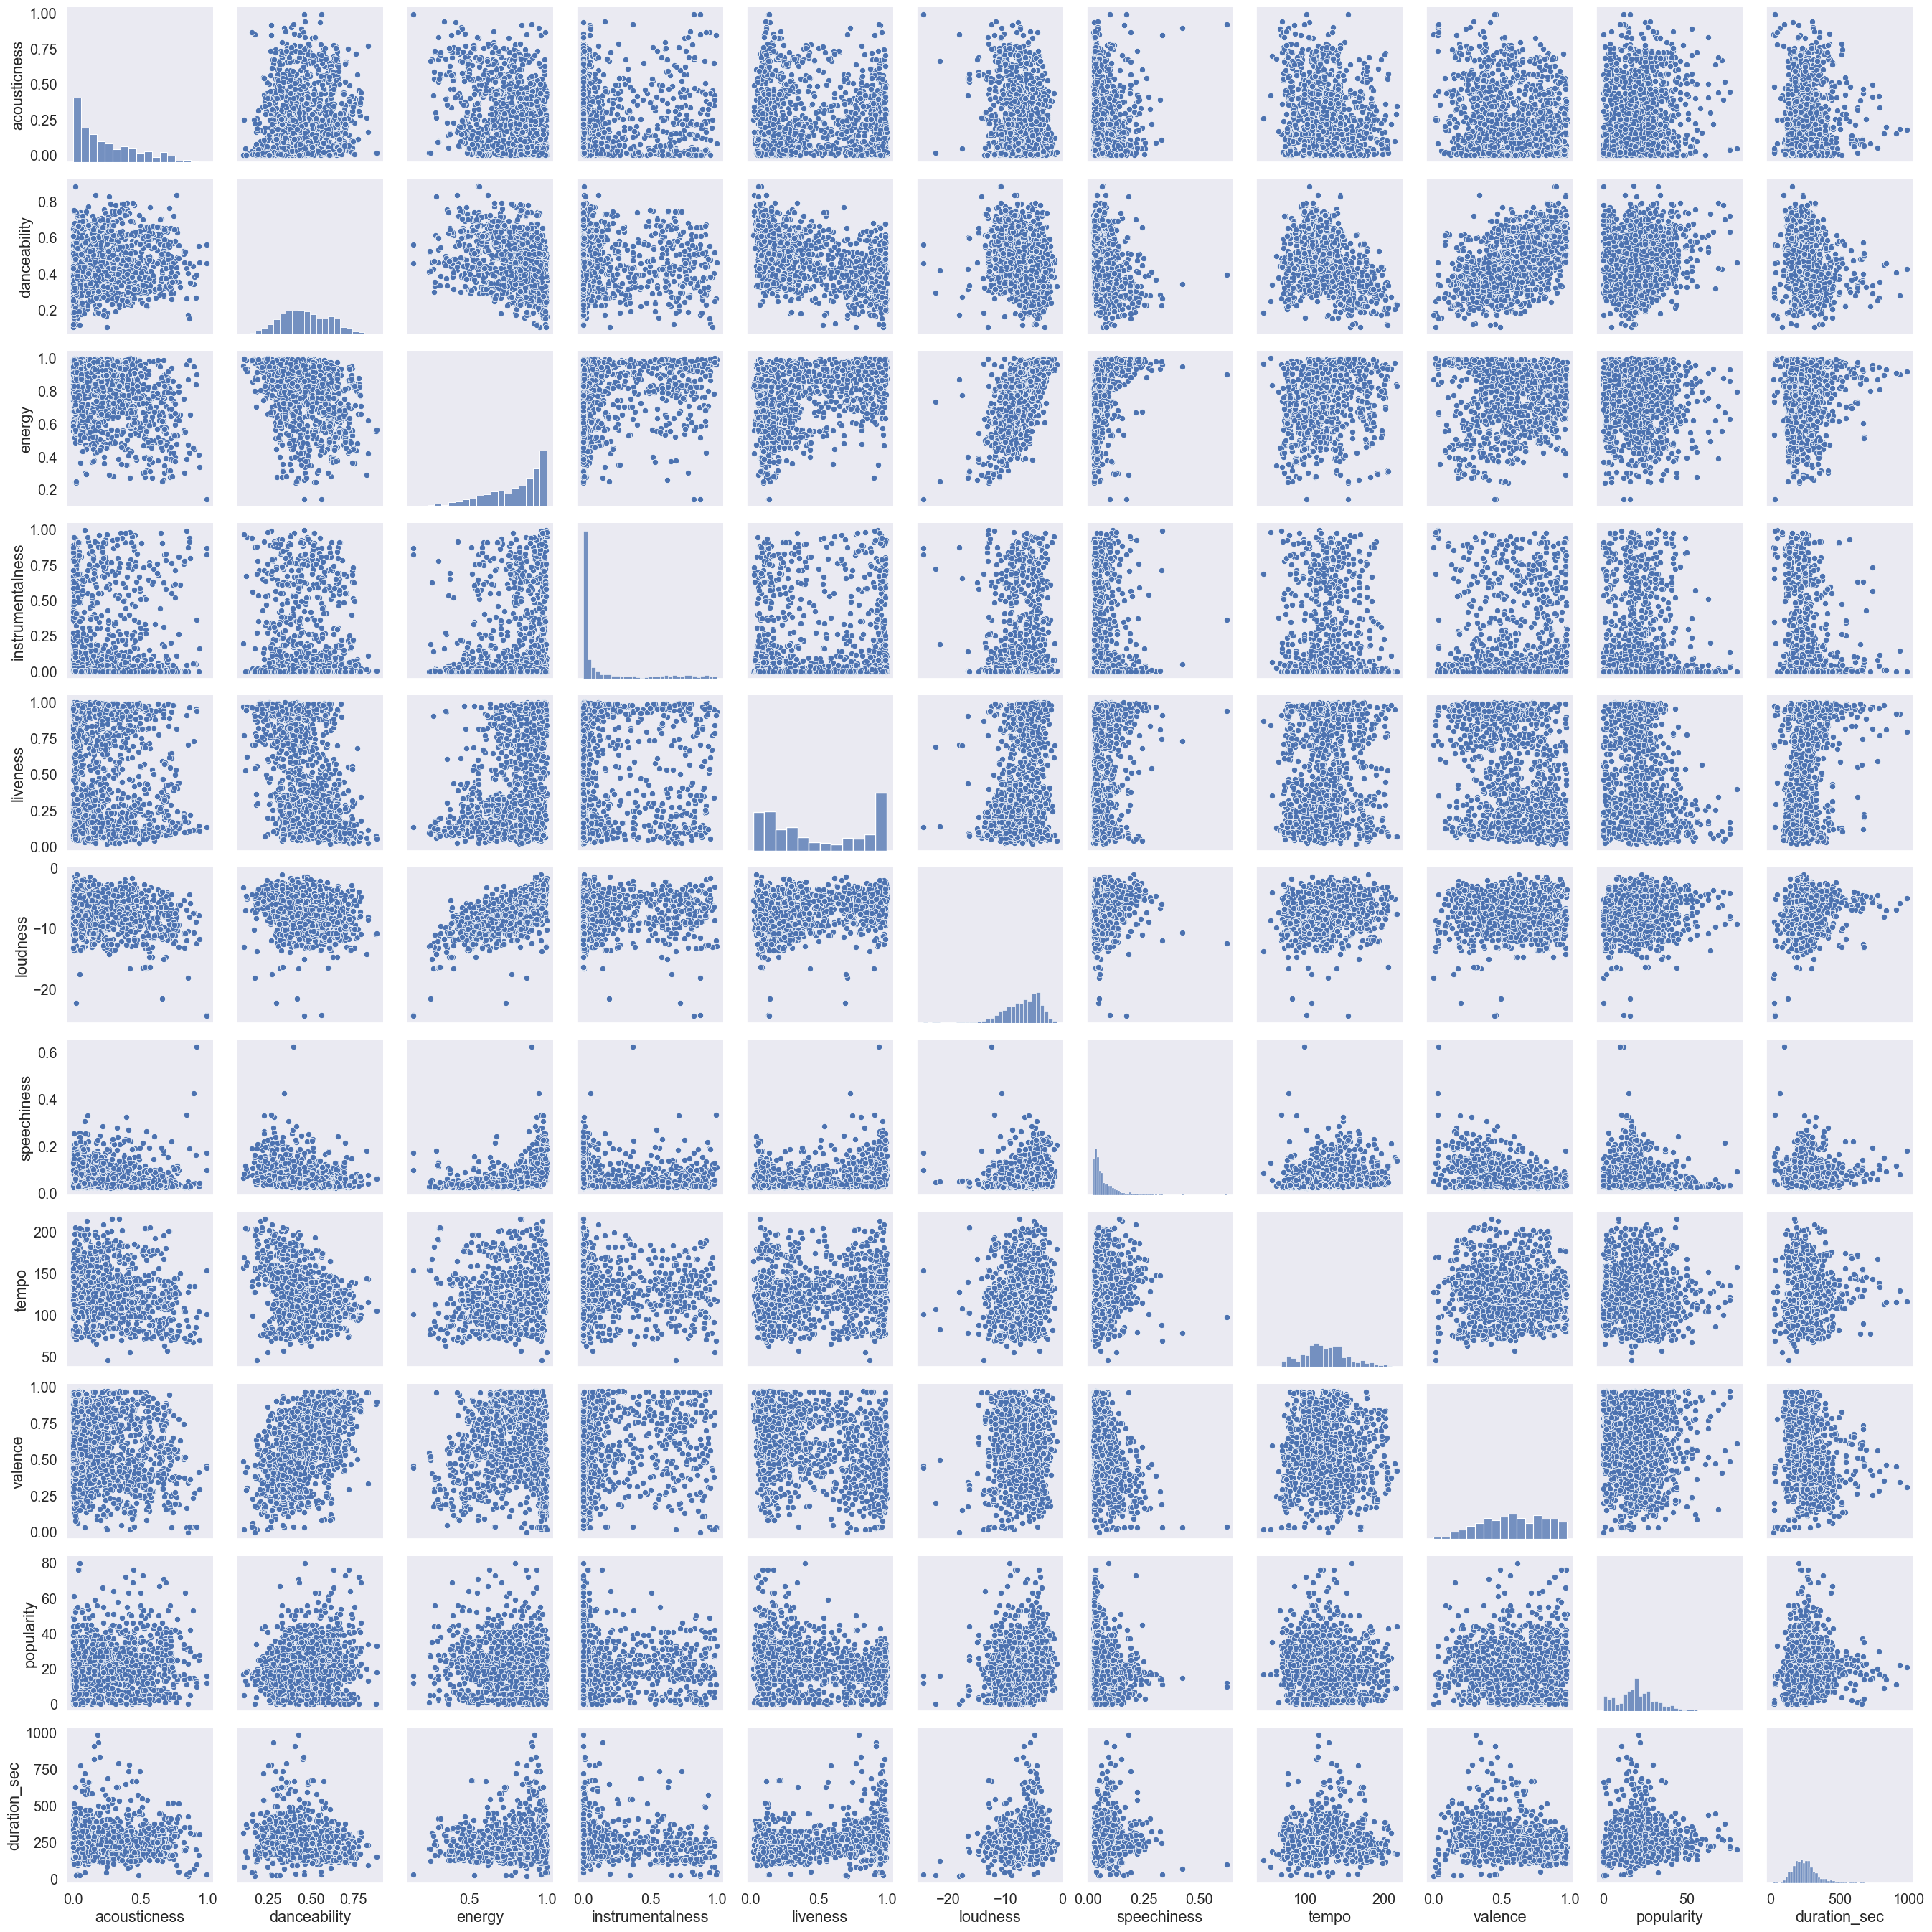

In [18]:
sns.pairplot(cluster_df,palette="dark")

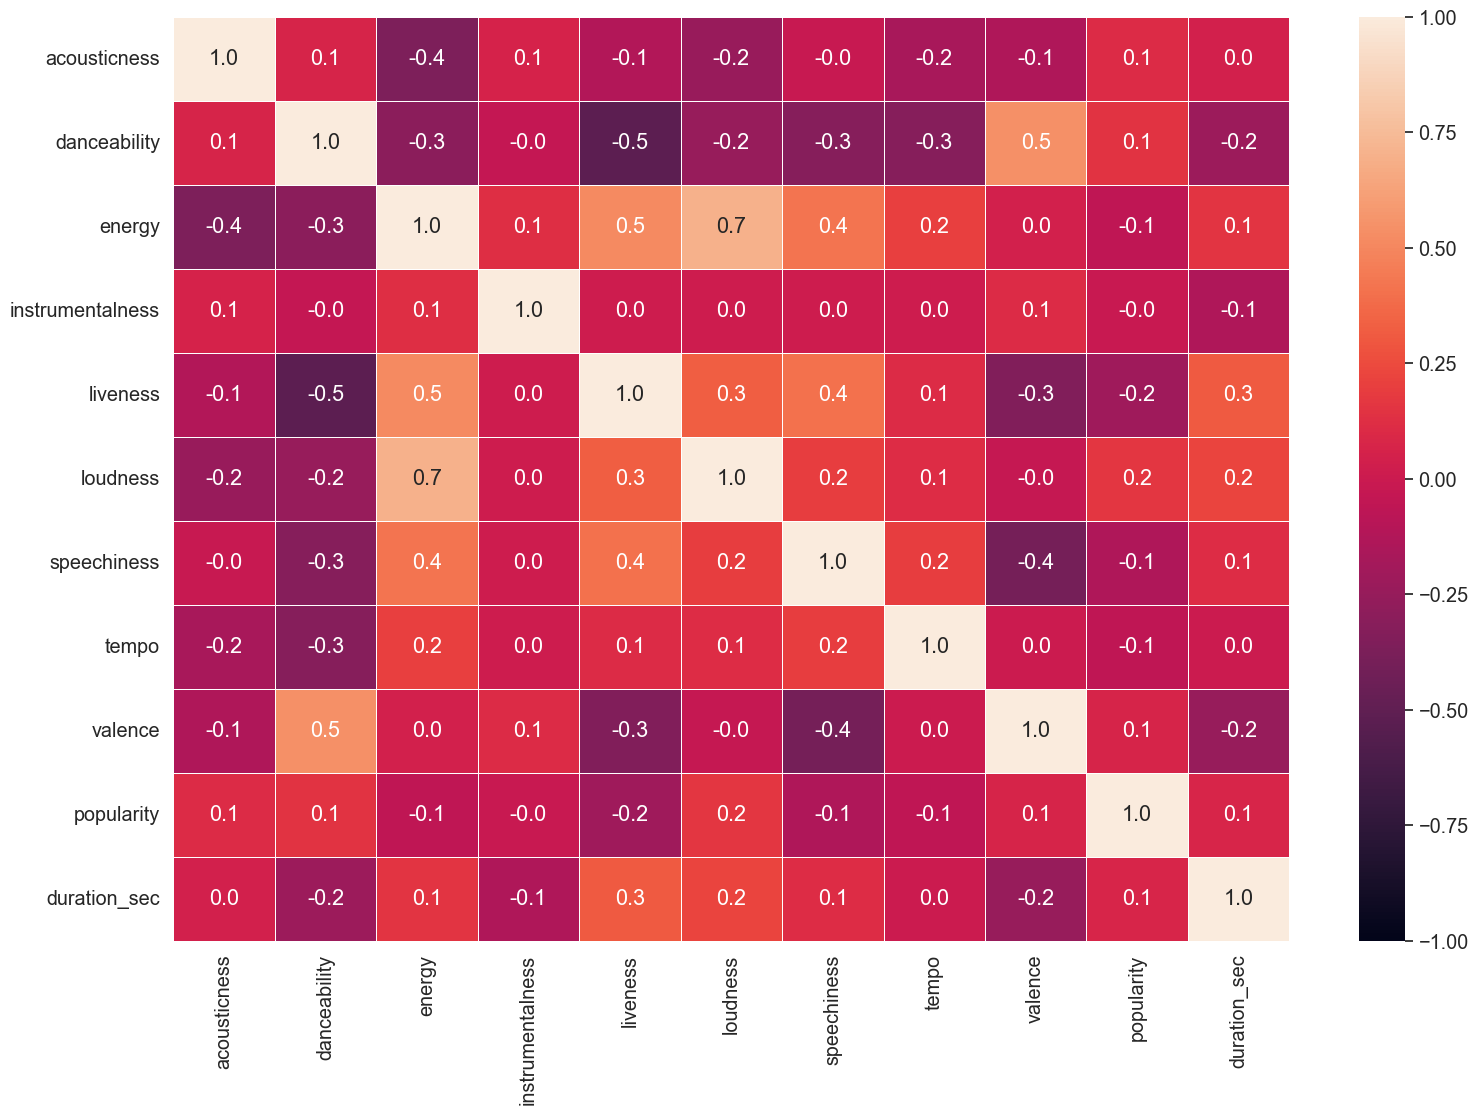

In [19]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(cluster_df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax,vmin=-1,vmax=1)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder as le_
le = le_()
cluster_df['album'] = le.fit_transform(cluster_df['album'])

In [21]:
cluster_df

album  acousticness  danceability  energy  instrumentalness  liveness  \
0        46        0.0824         0.463   0.993          0.996000    0.9320   
1        46        0.4370         0.326   0.965          0.233000    0.9610   
2        46        0.4160         0.386   0.969          0.400000    0.9560   
3        46        0.5670         0.369   0.985          0.000107    0.8950   
4        46        0.4000         0.303   0.969          0.055900    0.9660   
...     ...           ...           ...     ...               ...       ...   
1605     75        0.1570         0.466   0.932          0.006170    0.3240   
1606     75        0.0576         0.509   0.706          0.000002    0.5160   
1607     75        0.3710         0.790   0.774          0.000000    0.0669   
1608     75        0.2170         0.700   0.546          0.000070    0.1660   
1609     75        0.3830         0.727   0.934          0.068500    0.0965   

      loudness  speechiness    tempo  valence  popularity  duration_sec  
0      -12.913       0.1100  118.001   0.0302          33          48.6  
1       -4.803       0.0759  131.455   0.3180          34         253.2  
2       -4.936       0.1150  130.066   0.3130          34         263.2  
3       -5.535       0.1930  132.994   0.1470          32         305.9  
4       -5.098       0.0930  130.533   0.2060          32         305.1  
...        ...          ...      ...      ...         ...           ...  
1605    -9.214       0.0429  177.340   0.9670          39         154.1  
1606    -9.427       0.0843  122.015   0.4460          36         245.3  
1607    -7.961       0.0720   97.035   0.8350          30         176.1  
1608    -9.567       0.0622  102.634   0.5320          27         121.7  
1609    -8.373       0.0359  125.275   0.9690          35         189.2  

[1610 rows x 12 columns]

In [22]:
cluster_df['duration_sec'].describe()

count    1610.000000
mean      257.738199
std       108.334722
min        21.000000
25%       190.600000
50%       243.100000
75%       295.350000
max       981.900000
Name: duration_sec, dtype: float64

In [23]:
# from sklearn.preprocessing import StandardScaler as ss_
# ss = ss_()
# x = ss.fit_transform(cluster_df)

In [24]:
# min max scaler performs better than standard scaler
from sklearn.preprocessing import MinMaxScaler as mms_
mms = mms_()
x = mms.fit_transform(cluster_df)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

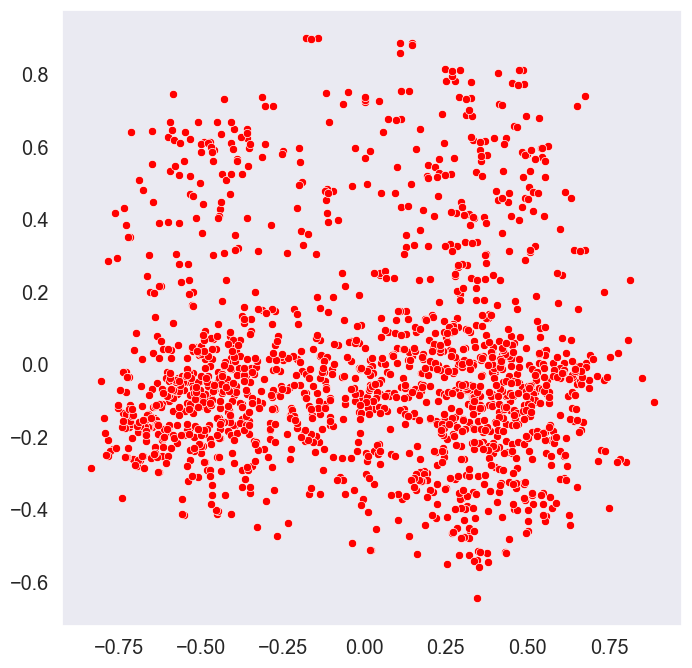

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(x[:,0],x[:,1],color='red')
plt.show()

# kmeans clustering

In [27]:
# trying for different number of clusters
from sklearn.cluster import KMeans

inertias = {}

for i in range(2,15):
    km = KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500,random_state=123)
    km.fit(x)
    inertias[i] = km.inertia_

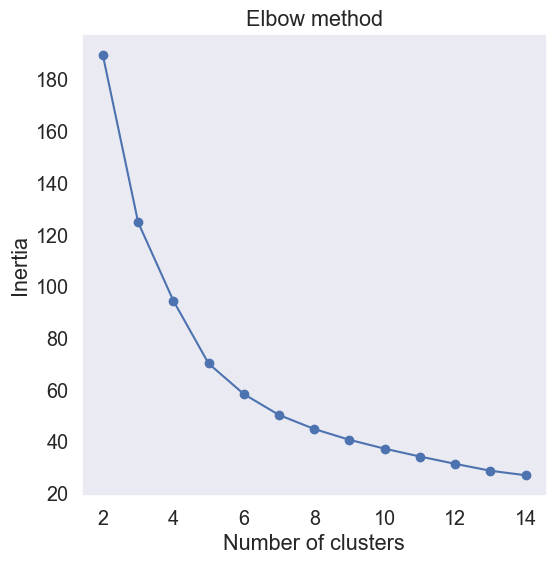

In [28]:
plt.figure(figsize=(6,6))
plt.plot(range(2,15), inertias.values(), marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
inertias.values()

dict_values([189.53348521379766, 124.9093277264329, 94.55833587807393, 70.25367017823534, 58.4312233953382, 50.32886422765819, 44.91109491130263, 40.71656029884827, 37.29196235104157, 34.26056266494804, 31.424349676669003, 28.756485350849985, 27.01029127271034])

In [30]:
# 5 clusters are optimal 
km5 = KMeans(n_clusters=5)
km5.fit(x)

km_predict = km5.predict(x)

km5.inertia_


70.25315168898129

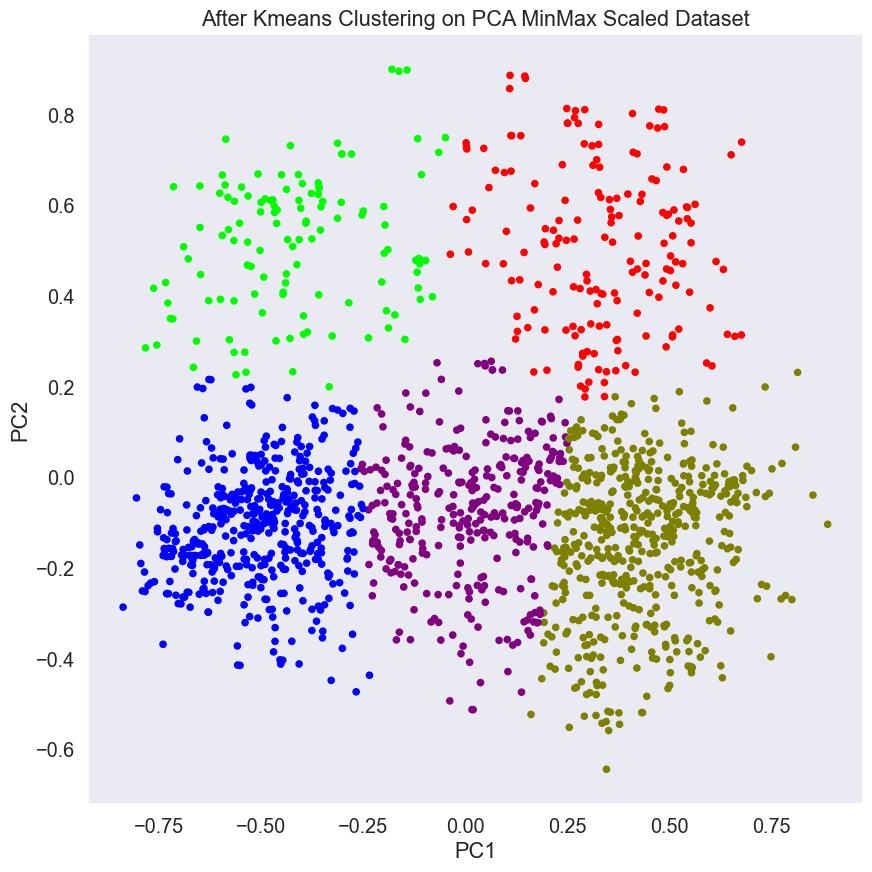

In [31]:
# Scatterplot
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(10,10)})
plt.scatter(x[:,0], x[:,1], c=km_predict, cmap="brg", s=20)

plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [32]:
centroids = km5.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [33]:
x_df = pd.DataFrame()
x_df['A'] = x[:,0]
x_df['B'] = x[:,1]
x_df['predict'] = km_predict
x_df['cen_x'] = x_df.predict.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4]})
x_df['cen_y'] = x_df.predict.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3],4:cen_y[4]})

In [34]:
def color(label):
    if label==0:
        return 'r'
    elif label==1:
        return 'b'
    elif label==2:
        return 'green'
    elif label==3:
        return 'k'
    else :
        return 'orange'

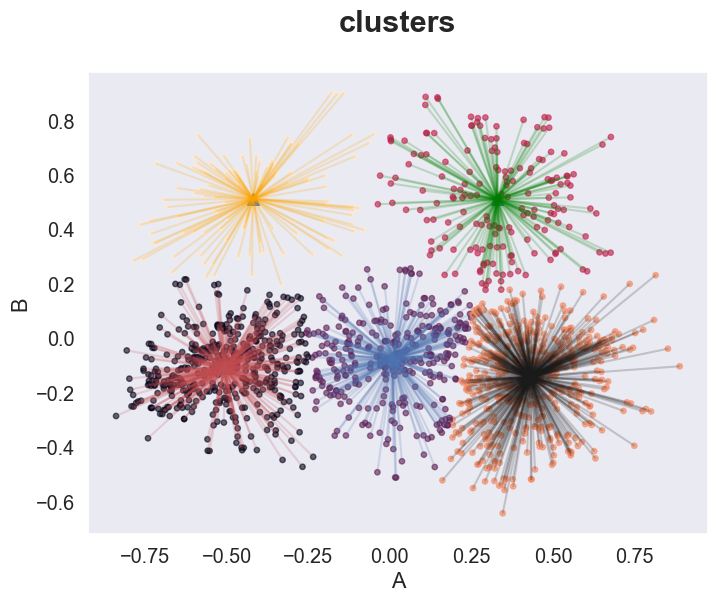

In [35]:
fig, ax = plt.subplots(1, figsize=(8,6))
# plot data
plt.scatter(x_df.A, x_df.B, c=km_predict,alpha = 0.6, s=15)

# plot centroids
plt.scatter(cen_x, cen_y, marker='^', s=70)

# plot lines
for idx, val in x_df.iterrows():
    a = [val.A, val.cen_x]
    b = [val.B, val.cen_y]
    plt.plot(a, b, alpha=0.2,color = color(val.predict))

plt.title('clusters\n', fontweight = 'bold',loc='center', fontsize=22)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

In [36]:
# addind predicted values to original dataset under new column
df['5 clusters']= km_predict

In [37]:
df['5 clusters'].value_counts()

3    527
0    467
1    322
2    173
4    121
Name: 5 clusters, dtype: int64

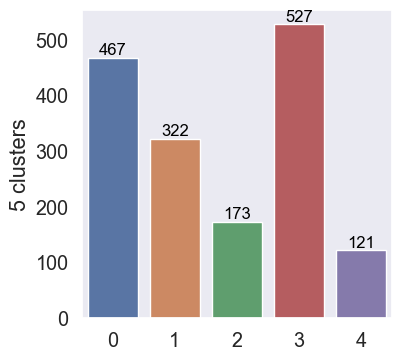

In [38]:
zx = df['5 clusters'].value_counts()
plt.figure(figsize=(4,4))
sns.barplot(df['5 clusters'].value_counts().index,df['5 clusters'].value_counts())
for i in range(len(zx)):
    plt.text(i,zx[i],zx[i],ha = 'center',va = 'bottom',color='black',fontsize=12)
plt.show()

In [39]:
df[df['5 clusters']==4][['name']][0:10]

name
0                          Concert Intro Music - Live
18                     It's Only Rock 'N' Roll - Live
20                                 Brown Sugar - Live
22                           Jumpin Jack Flash - Live
40       Rip This Joint - Live At The El Mocambo 1977
42  Jumpinâ€™ Jack Flash - Live At The El Mocambo ...
66      Under My Thumb - Live at Wembley Stadium 1982
67  When The Whip Comes Down - Live at Wembley Sta...
68  Let's Spend The Night Together - Live at Wembl...
70          Neighbours - Live at Wembley Stadium 1982

#  idnetifying number of clusters using silhouette score

In [40]:
from sklearn.metrics import silhouette_score as silscore

In [41]:
silscore(x,km.labels_)

0.3536522077950137

In [42]:
sil_kmeans = [KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500,random_state=123).fit(x) for i in range(1,10)]

sil_scores = [silscore(x,model.labels_)
              for model in sil_kmeans[1:]]

In [43]:
sil_scores

[0.500796123105478,
 0.5120512205949452,
 0.49228591959167567,
 0.4503089938277041,
 0.4231045938244882,
 0.40717771524372526,
 0.3648677142362715,
 0.35801005528331553]

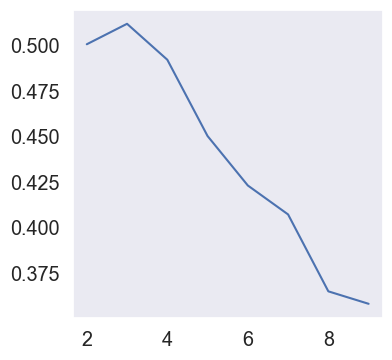

In [44]:
plt.figure(figsize = (4,4))
plt.plot(range(2,10),sil_scores)
plt.show()
# looking at this plot we can see that 3 is ooptimal number of clusters

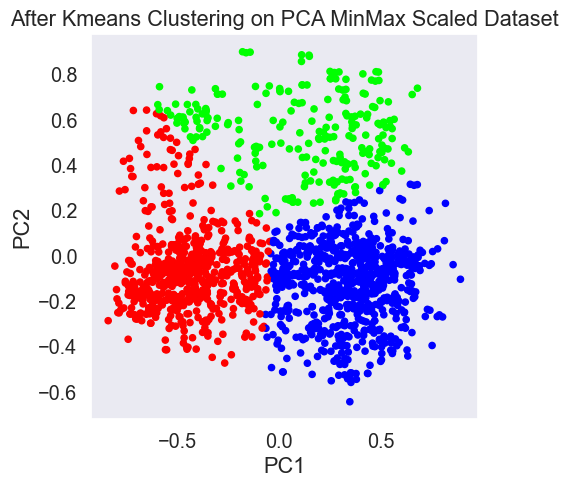

In [45]:
# lets se kmeans with 3 clusters
# 5 clusters are optimal 
km3 = KMeans(n_clusters=3)
km3.fit(x)

km_predict3 = km3.predict(x)

# Scatterplot
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(5,5)})
plt.scatter(x[:,0], x[:,1], c=km_predict3, cmap="brg", s=20)

plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [46]:
# adding these predictions to original dataset
df['3 clusters'] = km_predict3

In [47]:
df

Unnamed: 0                         name               album  \
0              0   Concert Intro Music - Live  Licked Live In NYC   
1              1   Street Fighting Man - Live  Licked Live In NYC   
2              2           Start Me Up - Live  Licked Live In NYC   
3              3  If You Can't Rock Me - Live  Licked Live In NYC   
4              4          Donâ€™t Stop - Live  Licked Live In NYC   
...          ...                          ...                 ...   
1605        1605                        Carol  The Rolling Stones   
1606        1606                      Tell Me  The Rolling Stones   
1607        1607          Can I Get A Witness  The Rolling Stones   
1608        1608   You Can Make It If You Try  The Rolling Stones   
1609        1609              Walking The Dog  The Rolling Stones   

     release_date  track_number                      id  \
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   
1      2022-06-10             2  6GVgVJBKkGJoRfarYRvGTU   
2      2022-06-10             3  1Lu761pZ0dBTGpzxaQoZNW   
3      2022-06-10             4  1agTQzOTUnGNggyckEqiDH   
4      2022-06-10             5  7piGJR8YndQBQWVXv6KtQw   
...           ...           ...                     ...   
1605   1964-04-16             8  08l7M5UpRnffGl0FyuRiQZ   
1606   1964-04-16             9  3JZllQBsTM6WwoJdzFDLhx   
1607   1964-04-16            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608   1964-04-16            11  5ivIs5vwSj0RChOIvlY3On   
1609   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_sec  5 clusters  3 clusters  
0      0.0302          33          48.6           4           2  
1      0.3180          34         253.2           0           1  
2      0.3130          34         263.2           0           1  
3      0.1470          32         305.9           0           1  
4      0.2060          32         305.1           0           1  
...       ...         ...           ...         ...         ...  
1605   0.9670          39         154.1           1           0  
1606   0.4460          36         245.3           1           1  
1607   0.8350          30         176.1           3           0  
1608  